In [1]:
import matplotlib.pyplot as plt
import numpy as np
import functools
import time

# Questão 1

Resolva o sistema linear $Ax = b$ em que


$
A =
\begin{bmatrix}
9. & −4. & 1. & 0. & 0. & 0. & 0. \\
−4. & 6. & −4. & 1. & 0. & 0. & 0. \\
1. & −4. & 6. & −4. & 1. & 0. & 0. \\
0. & 1. & −4. & 6. & −4. & 1. & 0. \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
0. & 0. & 1. & −4. & 6. & −4. & 1. \\
0. & 0. & 0. & 1. & −4. & 5. & −2. \\
0. & 0. & 0. & 0. & 1. & −2. & 1.
\end{bmatrix} \in R^{\; 200 \times 200}
$



e 

$
b =
\begin{bmatrix}
1 \\
1\\
1\\
1\\
\vdots\\
1\\
1\\
1\\
\end{bmatrix} \in
R^{\; 200}
$

usando o método da Eliminação de Gauss (com pivoteamento parcial) e os métodos iterativos de Gauss-Jacobi e Gauss-Seidel, se possível. Compare o desempenho dos métodos para a resolução do sistema linear em termos do tempo de execução.

In [2]:
def timer(f):
    @functools.wraps(f)
    def wrapper_timer(*args, **kwargs):
        tempo_inicio = time.perf_counter()
        retorno = f(*args, **kwargs)
        tempo_fim = time.perf_counter()
        tempo_exec = tempo_fim - tempo_inicio
        print(f"Tempo de Execução: {tempo_exec:0.4f} segundos")
        return retorno
    return wrapper_timer

In [3]:
def FatoracaoLUPivot(A):
    U = np.copy(A)
    n = A.shape[0]
    L = np.zeros_like(A)
    P = np.eye(n)

    m = 0

    for j in range(n):

        #Pivoteamento Parcial

        k = np.argmax(np.abs(U[j:,j])) + j
        U[j], U[k] = np.copy(U[k]), np.copy(U[j])
        P[j], P[k] = np.copy(P[k]), np.copy(P[j])

        L[j], L[k] = np.copy(L[k]), np.copy(L[j])

        m += 1

        for i in range(j + 1, n):
            L[i][j] = U[i][j]/U[j][j]
            for k in range(j + 1, n):
                U[i][k] -= L[i][j] * U[j][k]
            U[i][j] = 0
            m += 1
    L += np.eye(n)
    return L, U, P

In [4]:
def SubstituicaoRegressiva(U, c): # U triangular superior
    x = np.copy(c)
    n = U.shape[0]

    for i in range(n-1, -1, -1):
        for j in range(i + 1, n):
            x[i] -= (U[i,j] * x[j])
        x[i] /= U[i,i]
    return x

In [5]:
def SubstituicaoDireta(U, c): #U triangular inferior
    x = np.copy(c)
    n = U.shape[0]

    for i in range(n):
        for j in range(i):
            x[i] -= (U[i,j] * x[j])
        x[i] /= U[i,i]
    return x

In [6]:
@timer
def EliminacaoGaussLUPivot(A, b):
    L, U, P = FatoracaoLUPivot(A)
    # Resolver Ly = b e Ux = y
    y = SubstituicaoDireta(L, b)
    x = SubstituicaoRegressiva(U, y)

    return P, x

In [7]:
def buildA():
    A = np.zeros((200, 200))
    A[0,0:3] = np.array([9, -4, 1])
    A[1,0:4] = np.array([-4, 6, -4, 1])
    A[198,196:200] = np.array([1, -4, 5, -2])
    A[199,197:200] = np.array([1, -2, 1])

    for i in range(2, 198):
        A[i, i-2:i+3] = np.array([1, -4, 6, -4, 1])
    
    return A

In [8]:
A = buildA()
A

array([[ 9., -4.,  1., ...,  0.,  0.,  0.],
       [-4.,  6., -4., ...,  0.,  0.,  0.],
       [ 1., -4.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  6., -4.,  1.],
       [ 0.,  0.,  0., ..., -4.,  5., -2.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.]])

In [9]:
b = np.ones((200,1))
b

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

## Solução por Eliminação de Gauss com Pivoteamento Parcial

In [10]:
P, x = EliminacaoGaussLUPivot(A, b)

Tempo de Execução: 4.0179 segundos


In [11]:
x

array([[5.02500000e+03],
       [2.99500000e+04],
       [7.45760000e+04],
       [1.38705000e+05],
       [2.22140000e+05],
       [3.24685000e+05],
       [4.46145000e+05],
       [5.86326000e+05],
       [7.45035000e+05],
       [9.22080000e+05],
       [1.11727000e+06],
       [1.33041500e+06],
       [1.56132600e+06],
       [1.80981500e+06],
       [2.07569500e+06],
       [2.35878000e+06],
       [2.65888500e+06],
       [2.97582600e+06],
       [3.30942000e+06],
       [3.65948500e+06],
       [4.02584000e+06],
       [4.40830500e+06],
       [4.80670100e+06],
       [5.22085000e+06],
       [5.65057500e+06],
       [6.09570000e+06],
       [6.55605000e+06],
       [7.03145100e+06],
       [7.52173000e+06],
       [8.02671500e+06],
       [8.54623500e+06],
       [9.08012000e+06],
       [9.62820100e+06],
       [1.01903100e+07],
       [1.07662800e+07],
       [1.13559450e+07],
       [1.19591400e+07],
       [1.25757010e+07],
       [1.32054650e+07],
       [1.38482700e+07],


In [12]:
print(np.max(np.abs(P @ A @ x - b)))

2.384185791015625e-07


## Método Gauss-Jacobi

In [13]:
@timer
def GaussJacobi(A, b):
    n = A.shape[0]
    x_history = list()
    x_old = np.zeros(n)
    x_new = np.zeros(n)
    k_limite = 200
    k = 0
    tau = 1E-4
    Dr = 1

    while (k < k_limite and Dr > tau):
        for i in range(n):
            soma = 0
            for j in range(n):
                if (i == j):
                    continue
                soma += A[i,j]*x_old[j]
            x_new[i] = (b[i] - soma) / A[i,i]
        
        k += 1
        Dr = np.max(np.abs(x_new - x_old)) / np.max(np.abs(x_new))
        x_history.append(x_old)
        x_old = np.copy(x_new)
        
    return x_history, x_new

In [14]:
history, x = GaussJacobi(A, b)

Tempo de Execução: 4.8295 segundos


In [15]:
erros = []
for i in range(len(history)):
    erro = np.max(np.abs(A @ history[i] - b))
    if (erro != np.inf):
        erros.append(erro)

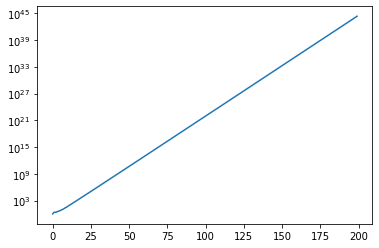

In [ ]:
plt.semilogy(erros)

## Método Gauss-Seidel

In [16]:
@timer
def GaussSeidel(A, b, k_limite=200):
    n = A.shape[0]
    x_history = list()
    x_old = np.zeros(n)
    x_new = np.zeros(n)
    k = 0
    tau = 1E-4
    Dr = 1

    while (k < k_limite and Dr > tau):
        for i in range(n):
            soma = 0
            for j in range(n):
                if (i == j):
                    continue
                soma += A[i,j]*x_new[j]
            x_new[i] = (b[i] - soma) / A[i,i]
        
        
        Dr = np.max(np.abs(x_new - x_old)) / np.max(np.abs(x_new))
        x_history.append(x_old)
        x_old = np.copy(x_new)
        k += 1

    if (Dr > tau):
        print("NÃO CONVERGIU!")
        
    return x_history, x_new

In [17]:
history, x = GaussSeidel(A, b)

NÃO CONVERGIU!
Tempo de Execução: 4.7215 segundos


In [18]:
print(np.max(np.abs(A @ x - b)))

1.4693583616174237


In [19]:
erros = []
for i in range(len(history)):
    erro = np.max(np.abs(A @ history[i] - b))
    if (erro != np.inf):
        erros.append(erro)

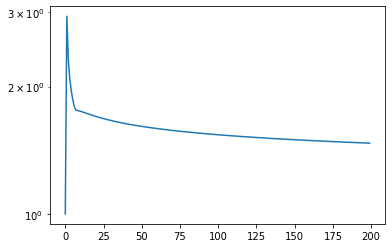

In [20]:
plt.semilogy(erros)

## Análise dos Resultados

Além de reutilizar as funções criadas para a Eliminação de Gauss com Pivoteamento Parcial, escrevi rotinas para implementar os métodos de Gauss-Jacobi e Gauss-Seidel. 

Ainda, criei uma função decoradora `timer` para envolver as rotinas de cada método de resolução de sistemas lineares para contabilizar e imprimir o respectivo tempo de execução.

Ao longo da análise, considerei o erro absoluto máximo como a componente de maior diferença, em módulo, entre $Ax$ e $b$.

O método de Eliminação de Gauss demorou $4,0178$ segundos e obteve a resposta correta, com erro absoluto máximo de aproximadamente $2,4E-7$.

O método de Gauss-Jacobi executou em $4,8295$ segundos e divergiu, com erro crescente a cada iteração.

O método de Gauss-Seidel executou em $4,7215$ segundos e apresentou uma condição peculiar. O resultado não divergiu, mas converge lentamente $-$ de forma que $200$ iterações não foram suficientes para obter a resposta correta e o erro absoluto máximo da última iteração permaneceu próximo de $1,5$.

Portanto, o método de melhor performance no caso analisado foi a Eliminação de Gauss com Pivoteamento Parcial, pois ela obteve a melhor resposta e executou em menos tempo.

# Questão 2

Determine valores de $\beta$ que garantem a convergência dos métodos de Gauss-Jacobi e Gauss-Seidel quando
aplicados para resolução do sistema linear $Ax = b$ em que


$A =
\begin{bmatrix}
−10 & 2 \\
\beta & 5
\end{bmatrix}$
e
$b =
\begin{bmatrix}
1 \\
1
\end{bmatrix}$

## Gauss-Jacobi

#### $i=1$:

$\sum_{j \ne i} |a_{ij}| = |a_{12}| = 2 < 10 = |a_{11}|$

#### $i=2$:

$\sum_{j \ne i} |a_{ij}| = |a_{21}|  = \beta < 5 = |a_{22}|$

Logo, a matriz é diagonalmente estritamente crescente para $\beta < 5$ e o conjunto de matrizes que satisfazem essa condição garante a convergência do Método de Gauss-Jacobi.

## Gauss-Seidel

### Critério das Linhas

Conforme vimos no critério de convergência para Gauss-Jacobi, a matriz é diagonalmente estritalmente crescente $-$ e, consequentemente o método de Gauss-Seidel converge $-$ para $\beta < 5$.

### Critério de Sassenfeld

#### $i=1$:

$\beta_1 = \frac{1}{|a_{11}|} \left( \sum_{j = 2}^2 |a_{1j}|\right)  = \frac{|a_{12}|}{|a_{11}|} = \frac{2}{10} = \frac{1}{5} < 1$

#### $i=2$:

$\beta_2 = \frac{1}{|a_{22}|} \left( \sum_{j = 1}^1 |a_{2j}| \beta_j\right)  = \frac{|a_{21}| \beta_1}{|a_{22}|} = \frac{\beta \times (1/5)}{5} = \frac{\beta}{25} < 1 \iff \beta < 25$

Dessa forma, como os dois critérios são independentemente suficientes para determinar a convergência do método, realizei a união dos intervalos de $\beta$.

Portanto, valores de $\beta$ no intervalo $\beta < 25$ garantem a convergência de Gauss-Seidel.